# Wine Quality Analysis

Dataset link : https://archive.ics.uci.edu/dataset/186/wine+quality

Kaggle Dataset link : https://www.kaggle.com/datasets/yasserh/wine-quality-dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv("data/WineQT.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


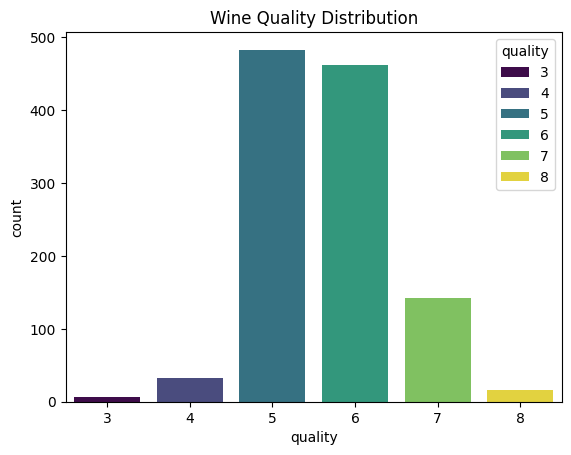

In [7]:
# Distribution of Target Variable (Quality)

sns.countplot(x="quality", data=df, palette="viridis", hue="quality")
plt.title("Wine Quality Distribution")
plt.show()

In [8]:
# Summary
print(df['quality'].value_counts().sort_index())

quality
3      6
4     33
5    483
6    462
7    143
8     16
Name: count, dtype: int64


In [11]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [14]:
df = df.drop(columns=["Id"])

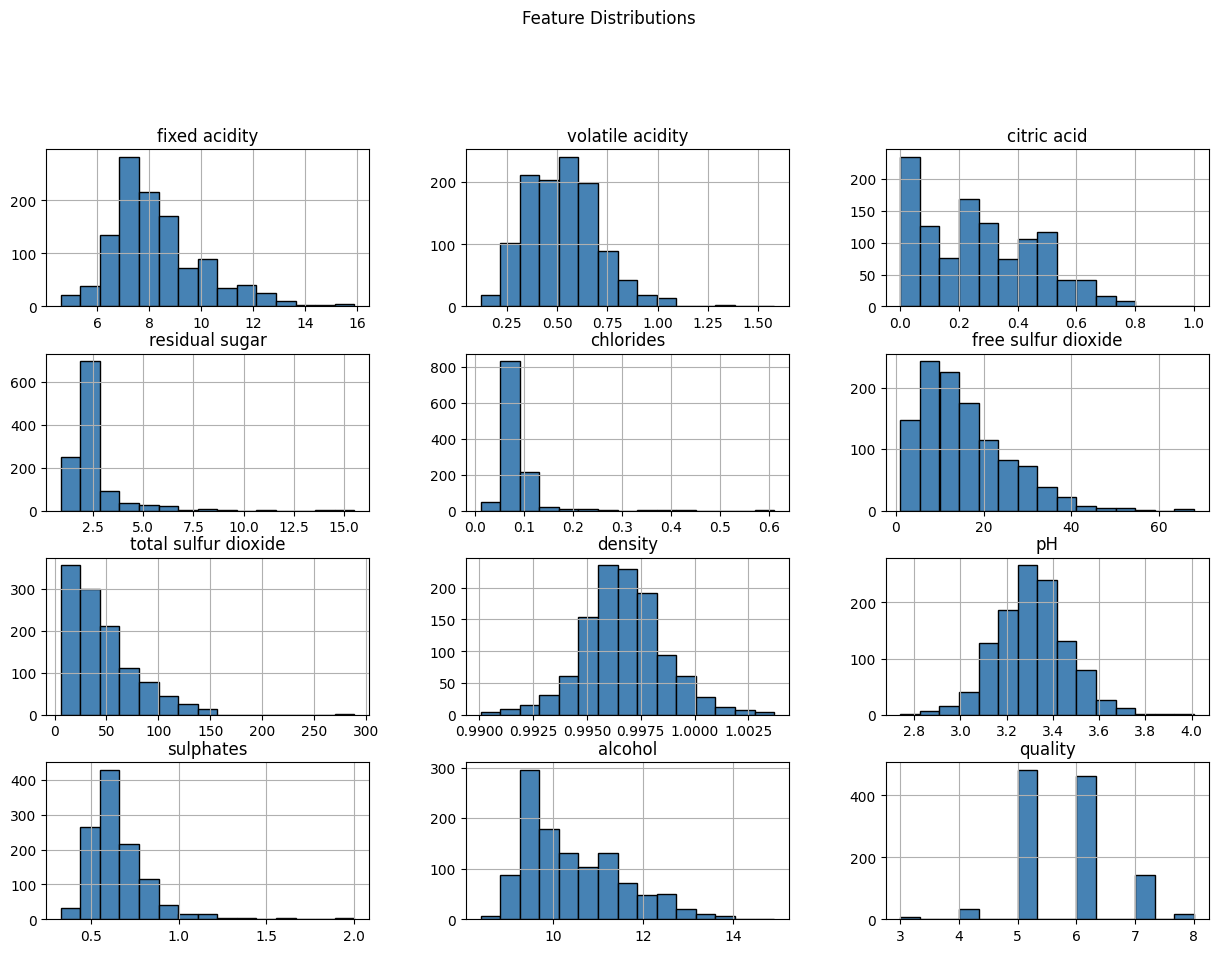

In [15]:
df.hist(bins=15, figsize=(15,10), color="steelblue", edgecolor="black")
plt.suptitle("Feature Distributions", y=1.02)
plt.show()

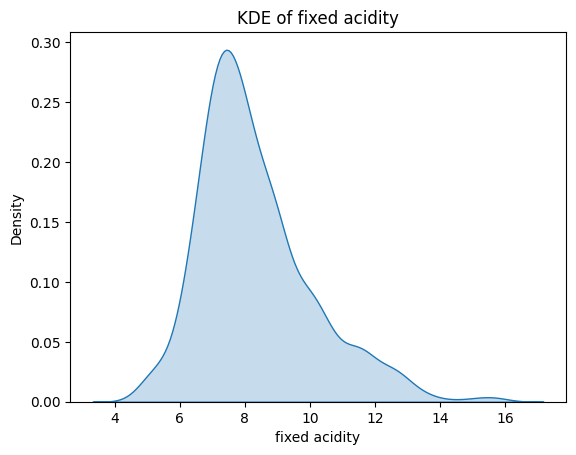

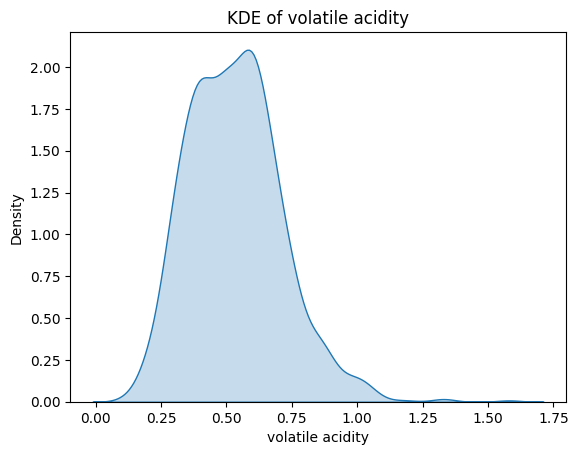

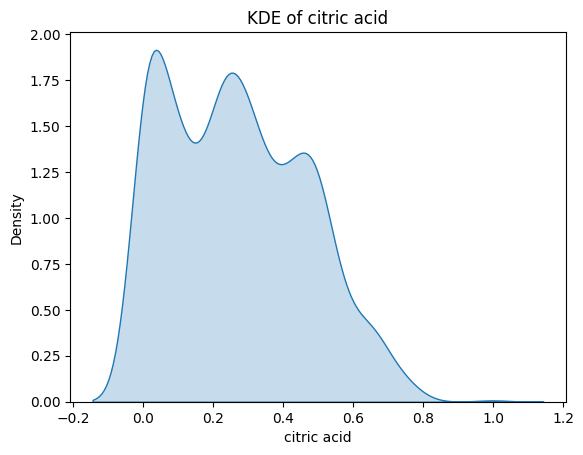

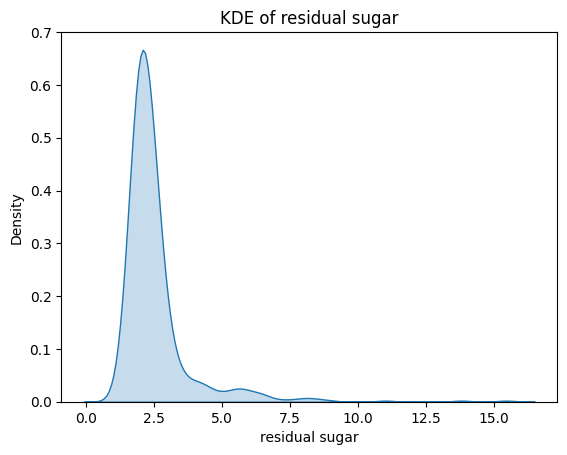

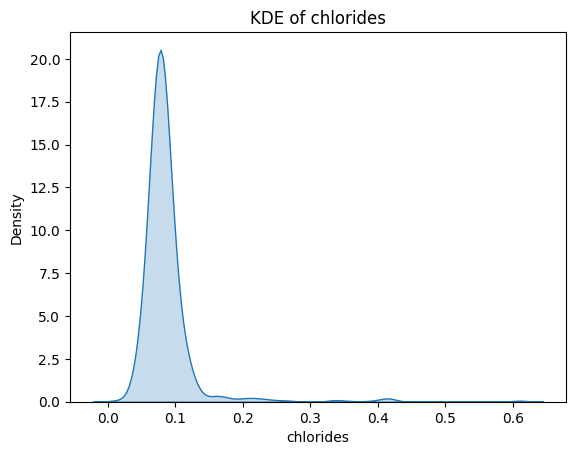

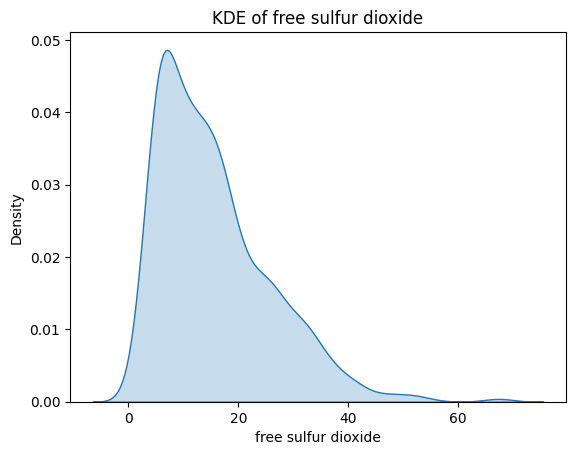

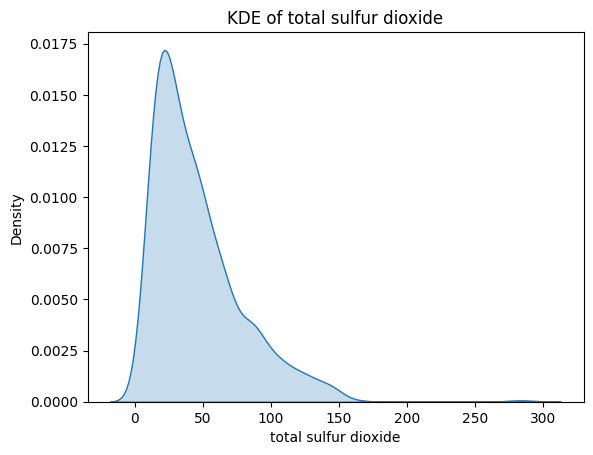

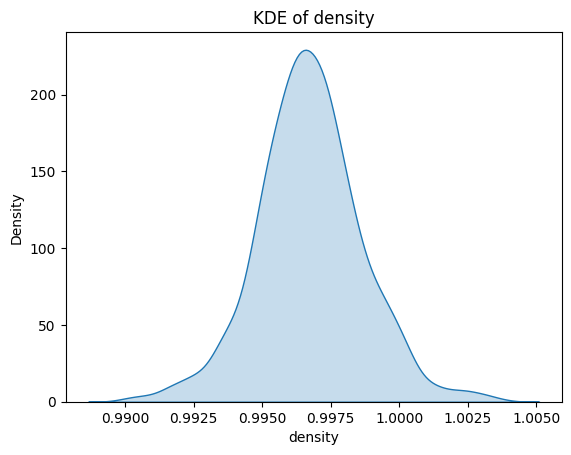

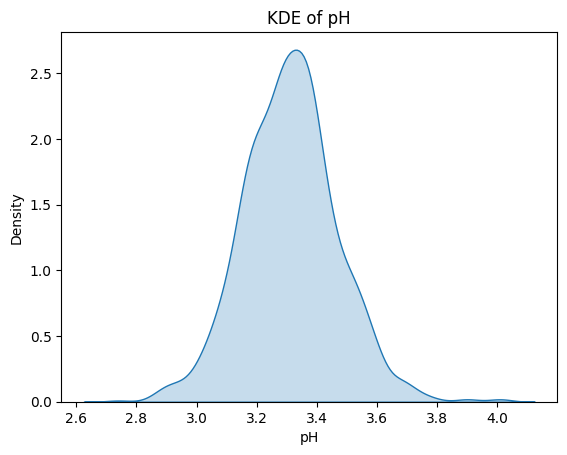

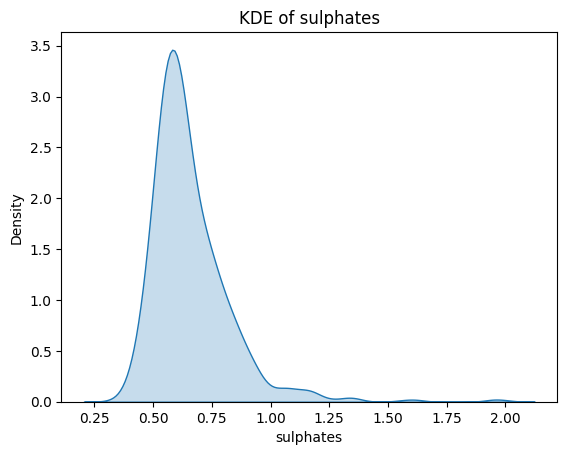

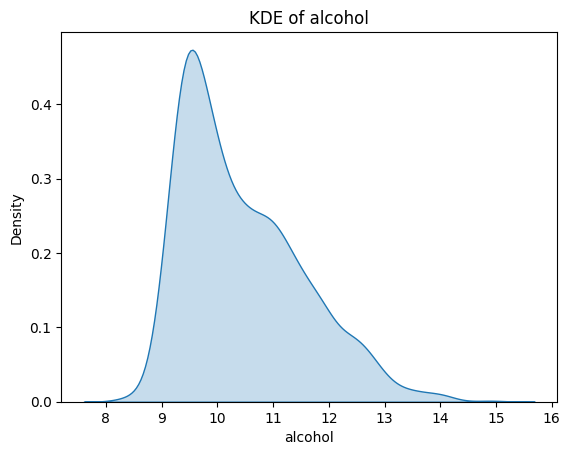

In [16]:
# KDE plots for smooth density
for col in df.drop(columns=["quality"]).columns:
    sns.kdeplot(df[col], fill=True)
    plt.title(f"KDE of {col}")
    plt.show()

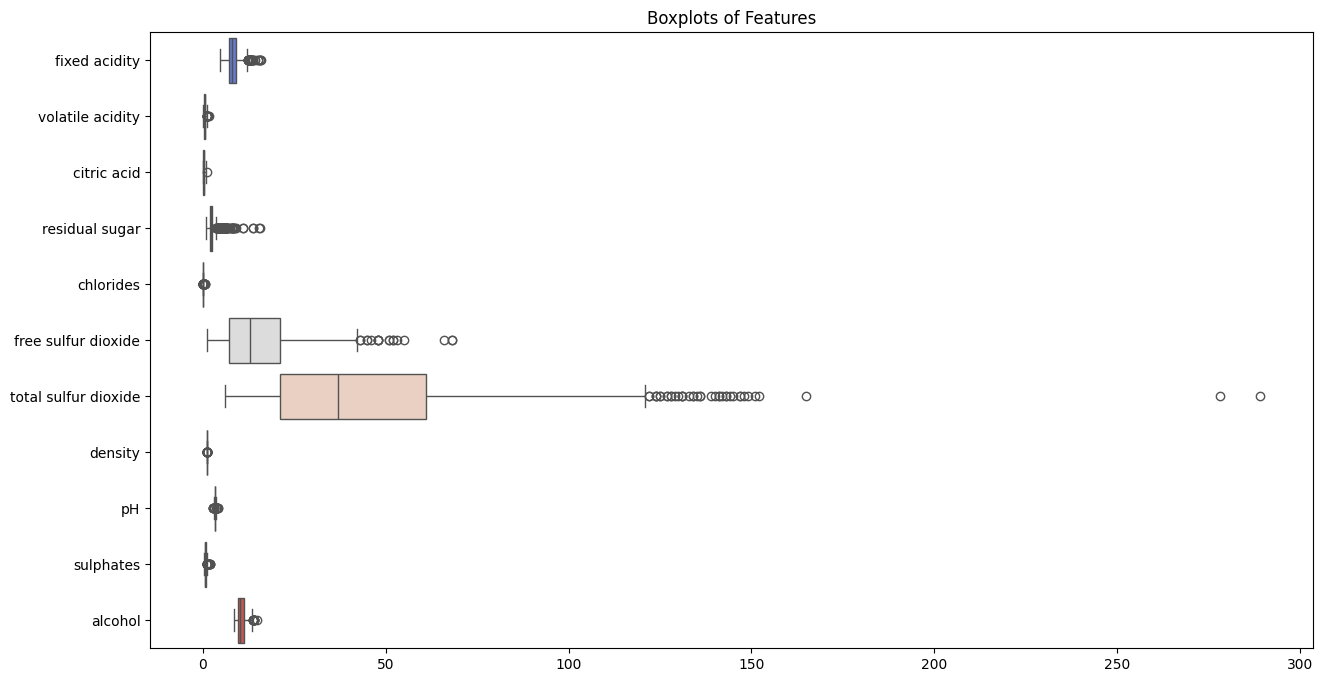

In [17]:
# Boxplots to check outliers
plt.figure(figsize=(15,8))
sns.boxplot(data=df.drop(columns=["quality"]), orient="h", palette="coolwarm")
plt.title("Boxplots of Features")
plt.show()

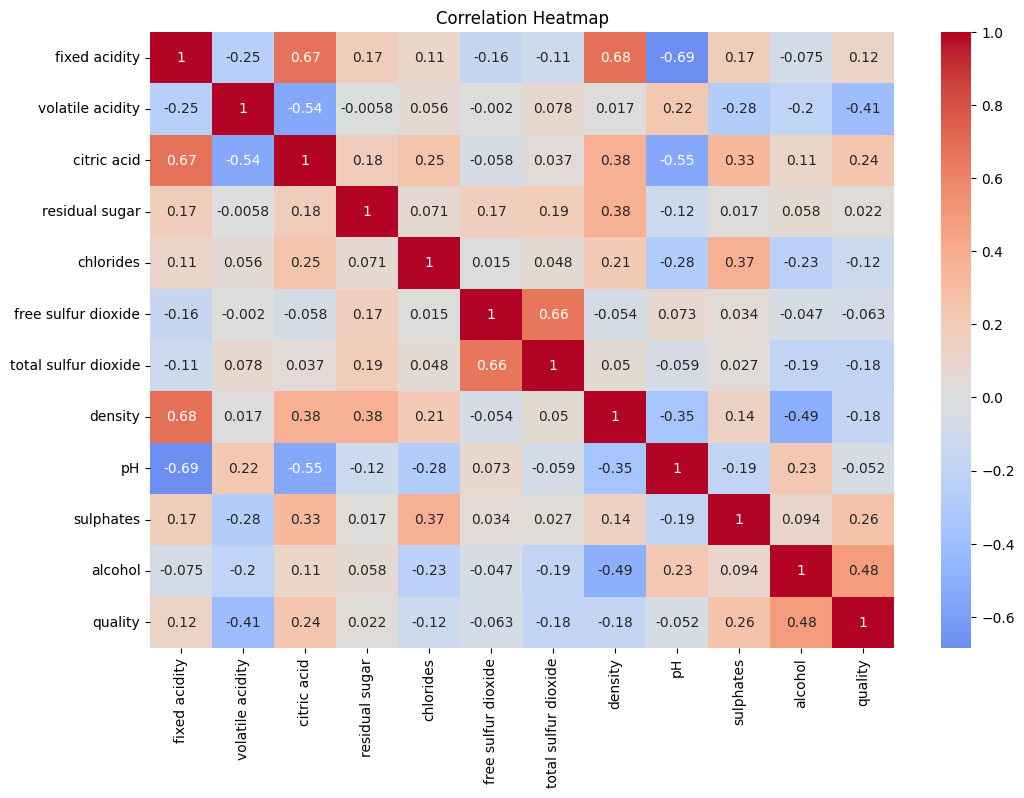

In [18]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

In [19]:
# Extra info w.r.t model training
# Outlier # all feature --> ml > Acuuracy
# Outlier # highly correlated features w.r.t target --> ml > Acuuracy
# without Outlier # highly correlated features w.r.t target --> ml > Acuuracy

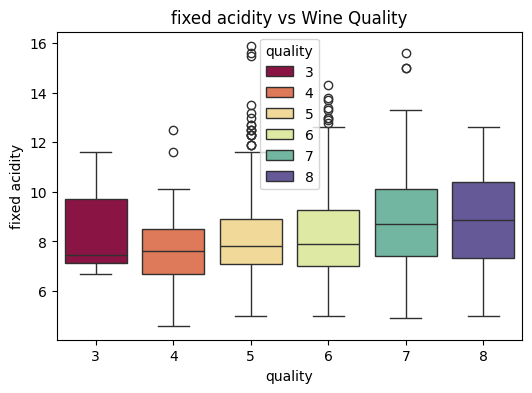

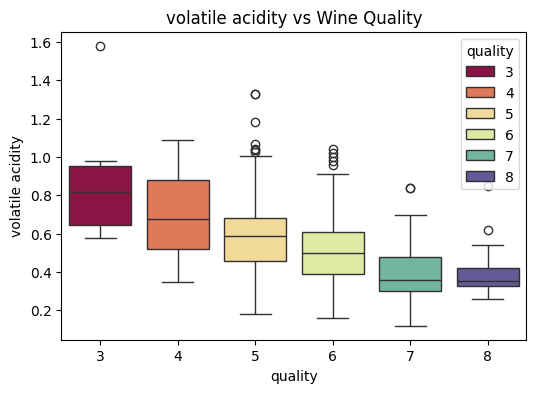

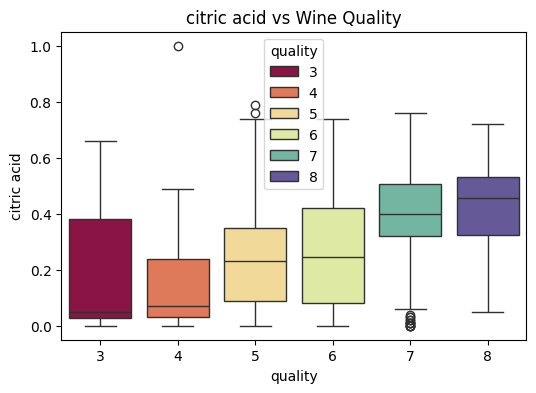

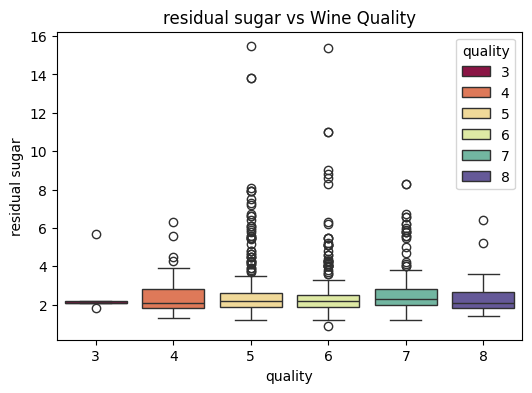

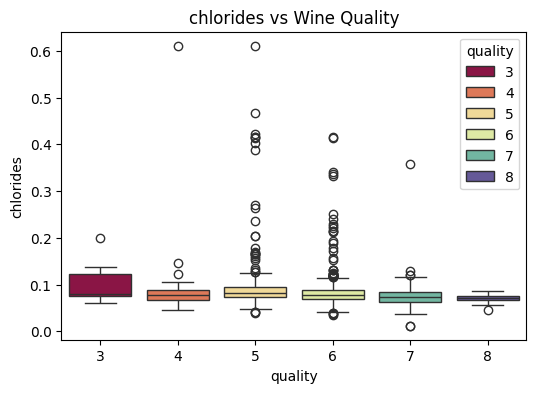

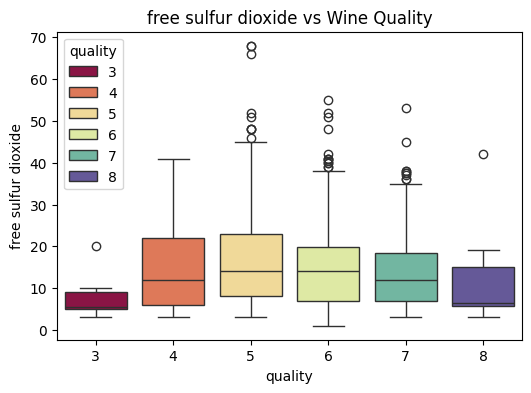

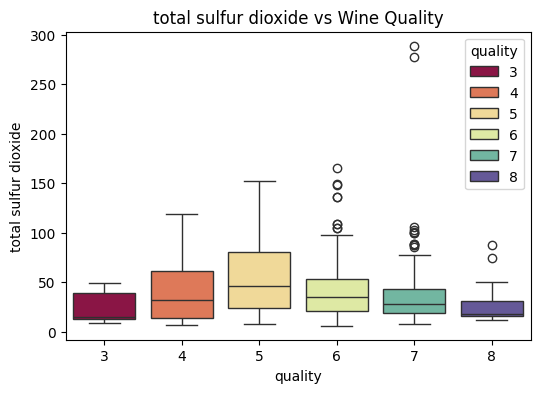

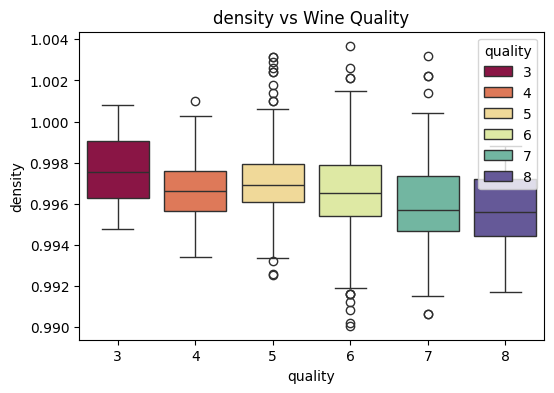

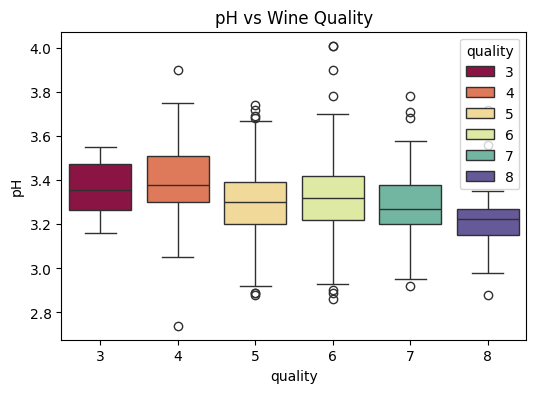

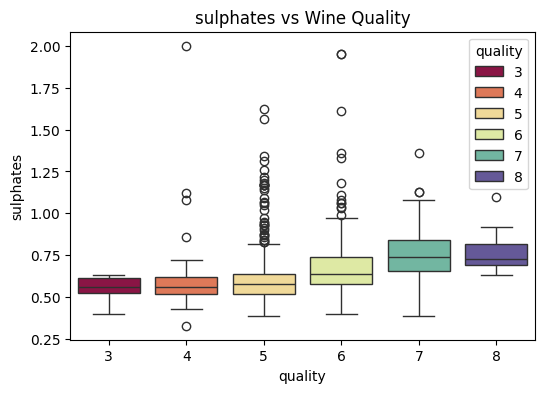

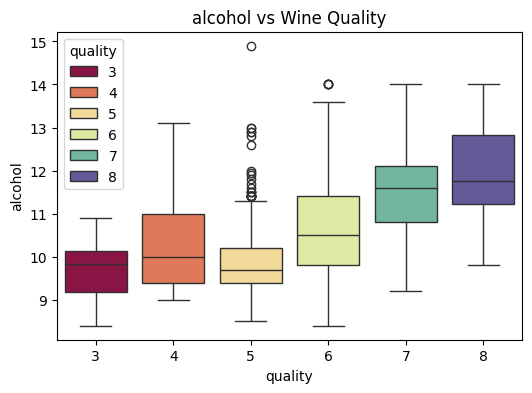

In [20]:
# Feature vs Target (Quality)
for col in df.drop(columns=["quality"]).columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="quality", y=col, data=df, palette="Spectral", hue="quality")
    plt.title(f"{col} vs Wine Quality")
    plt.show()

C:\Users\scl\AppData\Local\Temp\ipykernel_28068\659297264.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="quality", y="alcohol", data=df, palette="viridis")


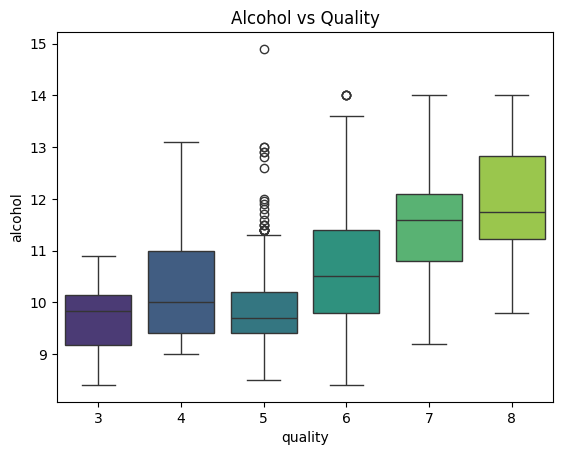

In [21]:
# Alcohol vs Quality
sns.boxplot(x="quality", y="alcohol", data=df, palette="viridis")
plt.title("Alcohol vs Quality")
plt.show()

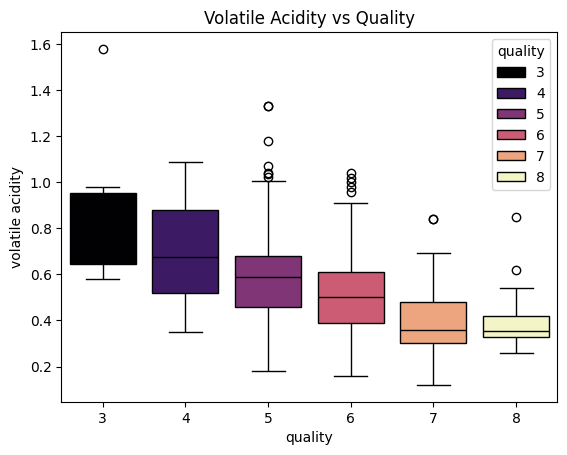

In [23]:
# Volatile acidity vs Quality
sns.boxplot(x="quality", y="volatile acidity", data=df, hue="quality",palette="magma")
plt.title("Volatile Acidity vs Quality")
plt.show()

In [ ]:
# Outlier Detection (IQR method)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

In [25]:
Q1

fixed acidity            7.10000
volatile acidity         0.39250
citric acid              0.09000
residual sugar           1.90000
chlorides                0.07000
free sulfur dioxide      7.00000
total sulfur dioxide    21.00000
density                  0.99557
pH                       3.20500
sulphates                0.55000
alcohol                  9.50000
quality                  5.00000
Name: 0.25, dtype: float64

In [26]:
print("Outliers per feature:\n", outliers)

Outliers per feature:
 fixed acidity            44
volatile acidity         14
citric acid               1
residual sugar          110
chlorides                77
free sulfur dioxide      18
total sulfur dioxide     40
density                  36
pH                       20
sulphates                43
alcohol                  12
quality                  22
dtype: int64


In [ ]:
# In short:

# Use SMOTE when you want balanced synthetic data with less risk of noise.

# Use ADASYN when minority samples are complex/overlapping, 
# and you want the model to focus on difficult cases.


In [27]:
# Optional cleaned dataset
df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Original shape:", df.shape)
print("Cleaned shape:", df_cleaned.shape)

Original shape: (1143, 12)
Cleaned shape: (834, 12)


In [29]:
df.shape[0] - df_cleaned.shape[0]

309

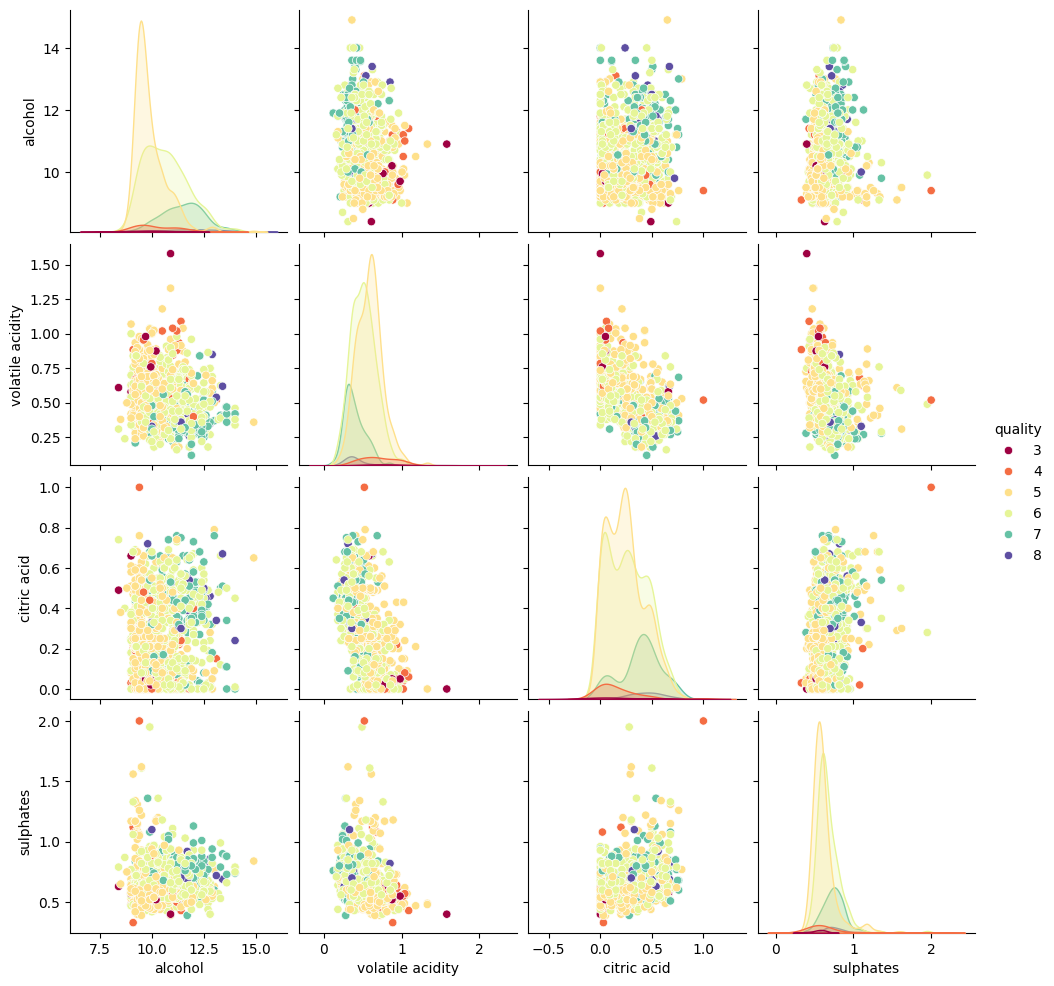

In [30]:
# Pairplot for selected features (interesting relationships)
sns.pairplot(df[["alcohol", "volatile acidity", "citric acid", "sulphates", "quality"]],
             hue="quality", palette="Spectral", diag_kind="kde")

# Inferential stats

In [31]:
import numpy as np
from scipy.stats import ttest_ind

In [32]:
# Define low-quality (≤5) and high-quality (≥6) wines
low_quality = df[df["quality"] <= 5]
high_quality = df[df["quality"] >= 6]

In [36]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [33]:
print("Low-quality wines:", len(low_quality))
print("High-quality wines:", len(high_quality))

Low-quality wines: 522
High-quality wines: 621


In [39]:
t_results = {}

# H0 : column value is the same for low quality wine and high quality wine
# H1 : Otherwise

for col in df.drop(columns=["quality"]).columns:
    t_stat, p_val = ttest_ind(low_quality[col], high_quality[col], equal_var=False)
    t_results[col] = {"t-stat": t_stat, "p-value-full": f"{p_val}", "p-value": f"{p_val:.6f}"}

t_results_df = pd.DataFrame(t_results).T.sort_values("p-value")
print("T-Test Results (Low vs High Quality):\n", t_results_df)

T-Test Results (Low vs High Quality):
                          t-stat            p-value-full   p-value
volatile acidity      11.729033   5.926244993381505e-30  0.000000
citric acid           -5.350667  1.0595561526145683e-07  0.000000
total sulfur dioxide   7.688332  3.6581808921737504e-14  0.000000
density                5.380901   8.995703547367877e-08  0.000000
sulphates             -8.093156  1.5548885506213307e-15  0.000000
alcohol               -17.06708  3.7124677991679934e-58  0.000000
chlorides              3.309595   0.0009716500889754157  0.000972
fixed acidity          -3.05315   0.0023169629253487673  0.002317
free sulfur dioxide    2.364418     0.01823976642352048  0.018240
pH                    -0.515917      0.6060146450142849  0.606015
residual sugar           0.2592      0.7955310556445903  0.795531


In [ ]:
# P < 0.05 : we reject h0 ELSE we fail to reject H0 (Accept H0)

In [ ]:
# "residual sugar" (0.79) < 0.05 = True : False
# residual sugar does not change with change in wine quality


# We accept H0

# - H0 is the truth

# - reject H0, fail to reject
